## Data Mining Project - Olist Sentiment Analysis

### Loading Libraries, Datasets and Preprocessing

In [134]:
#%pip install tensorflow
#%pip install -U scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

# Read files

data_cust = pd.read_csv("datasets/olist_customers_dataset.csv")
data_order_item = pd.read_csv("datasets/olist_order_items_dataset.csv")
data_order_paym = pd.read_csv("datasets/olist_order_payments_dataset.csv")
data_order_review = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
data_order_main = pd.read_csv("datasets/olist_orders_dataset.csv")
data_product = pd.read_csv("datasets/olist_products_dataset.csv")
data_sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
data_product_cate_name = pd.read_csv("datasets/product_category_name_translation.csv")

# Merge files

compiled_df = data_cust.merge(data_order_main, how='inner', on='customer_id')
compiled_df = compiled_df.merge(data_order_review, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_order_paym, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_order_item, how='inner', on='order_id')
compiled_df = compiled_df.merge(data_product, how='inner', on='product_id')
compiled_df = compiled_df.merge(data_sellers, how='inner', on='seller_id')
compiled_df = compiled_df.merge(data_product_cate_name, how='inner', on='product_category_name')

# Remove missing values

compiled_df = compiled_df.dropna(axis = 0)
display(compiled_df)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
44,90714b0e62fe1fbd304fb45fd644ebdd,c666e59a2d3ced923880461526113d38,4247,sao paulo,SP,64a9f2b487f66506d463ca18152280e8,delivered,2018-02-24 08:45:01,2018-02-24 09:47:40,2018-03-01 21:38:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
45,ab156e9202420e577b405360a7b29cbc,b52b8debdefe66d4c0d7f44d9b4ff088,28950,armacao dos buzios,RJ,54d6f9d8f56229d3da815add65ec2408,delivered,2018-03-22 10:58:13,2018-03-22 11:15:35,2018-04-05 20:07:42,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
46,ab156e9202420e577b405360a7b29cbc,b52b8debdefe66d4c0d7f44d9b4ff088,28950,armacao dos buzios,RJ,54d6f9d8f56229d3da815add65ec2408,delivered,2018-03-22 10:58:13,2018-03-22 11:15:35,2018-04-05 20:07:42,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
57,7c5b076d0e0538b3a1d4899bd25f9545,5bd86f8bd79bd3de2c99a5af1699b6a1,29620,itarana,ES,626434e11c37535d5f24e9d844249b55,delivered,2018-04-03 17:25:14,2018-04-05 02:15:14,2018-04-18 22:38:28,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
58,7c5b076d0e0538b3a1d4899bd25f9545,5bd86f8bd79bd3de2c99a5af1699b6a1,29620,itarana,ES,626434e11c37535d5f24e9d844249b55,delivered,2018-04-03 17:25:14,2018-04-05 02:15:14,2018-04-18 22:38:28,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115582,28738edfba72391be47d697e6e7e5770,e839774c9d31569dba47946296e58b33,11035,santos,SP,31a2886d02ad2127bfec204da2e93b66,delivered,2018-07-25 10:27:00,2018-07-25 10:35:17,2018-07-25 14:53:00,...,529.0,2.0,325.0,27.0,10.0,14.0,6449,barueri,SP,arts_and_craftmanship
115584,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1002.0,3.0,1900.0,19.0,16.0,16.0,95910,lajeado,RS,arts_and_craftmanship
115585,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,660.0,3.0,500.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship
115586,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,942.0,5.0,500.0,21.0,7.0,14.0,17201,jau,SP,arts_and_craftmanship


In [135]:
# Remove meaningless columns

# Remove category name in Brazilian (because we already have it in English)
pre_data = compiled_df.drop(['product_category_name'], axis = 1)

import re

# List of all ids
ids = []

# If a column has id in its name, add it to the list
for s in pre_data.columns:
    if re.search('id', s):
        #print(s)
        ids.append(s)

print(ids)

# Remove ids
pre_data = pre_data.drop(ids, axis = 1)

# Remove comment strings
pre_data = pre_data.drop(['review_comment_title', 'review_comment_message'], axis = 1)
display(pre_data)
print(pre_data.columns)

['customer_id', 'customer_unique_id', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'product_width_cm']


,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
44,4247,sao paulo,SP,delivered,2018-02-24 08:45:01,2018-02-24 09:47:40,2018-03-01 21:38:37,2018-03-02 21:51:59,2018-03-27 00:00:00,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
45,28950,armacao dos buzios,RJ,delivered,2018-03-22 10:58:13,2018-03-22 11:15:35,2018-04-05 20:07:42,2018-05-21 17:52:28,2018-04-30 00:00:00,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
46,28950,armacao dos buzios,RJ,delivered,2018-03-22 10:58:13,2018-03-22 11:15:35,2018-04-05 20:07:42,2018-05-21 17:52:28,2018-04-30 00:00:00,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
57,29620,itarana,ES,delivered,2018-04-03 17:25:14,2018-04-05 02:15:14,2018-04-18 22:38:28,2018-04-27 14:37:32,2018-05-03 00:00:00,3,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
58,29620,itarana,ES,delivered,2018-04-03 17:25:14,2018-04-05 02:15:14,2018-04-18 22:38:28,2018-04-27 14:37:32,2018-05-03 00:00:00,3,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115582,11035,santos,SP,delivered,2018-07-25 10:27:00,2018-07-25 10:35:17,2018-07-25 14:53:00,2018-07-27 01:27:37,2018-08-02 00:00:00,5,...,53.0,529.0,2.0,325.0,27.0,10.0,6449,barueri,SP,arts_and_craftmanship
115584,88350,brusque,SC,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,5,...,47.0,1002.0,3.0,1900.0,19.0,16.0,95910,lajeado,RS,arts_and_craftmanship
115585,9951,diadema,SP,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,3,...,32.0,660.0,3.0,500.0,16.0,6.0,17201,jau,SP,arts_and_craftmanship
115586,9951,diadema,SP,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,3,...,57.0,942.0,5.0,500.0,21.0,7.0,17201,jau,SP,arts_and_craftmanship


Index(['customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'shipping_limit_date', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')


Split of dataset

In [136]:
# converting to datetime
pre_data['order_purchase_timestamp'] = pd.to_datetime(compiled_df.order_purchase_timestamp)
pre_data['order_approved_at'] = pd.to_datetime(compiled_df.order_approved_at).dt.date
pre_data['order_estimated_delivery_date'] = pd.to_datetime(compiled_df.order_estimated_delivery_date).dt.date  
pre_data['order_delivered_customer_date'] = pd.to_datetime(compiled_df.order_delivered_customer_date).dt.date  

# Drop columns (that are not in the following list)
"""
compiled_df1 = pre_data[['order_status','freight_value', 'price',
                 'order_approved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score', 'order_purchase_timestamp']]
compiled_df1
"""
pre_data.head()

,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
44,4247,sao paulo,SP,delivered,2018-02-24 08:45:01,2018-02-24,2018-03-01 21:38:37,2018-03-02,2018-03-27,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
45,28950,armacao dos buzios,RJ,delivered,2018-03-22 10:58:13,2018-03-22,2018-04-05 20:07:42,2018-05-21,2018-04-30,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
46,28950,armacao dos buzios,RJ,delivered,2018-03-22 10:58:13,2018-03-22,2018-04-05 20:07:42,2018-05-21,2018-04-30,1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
57,29620,itarana,ES,delivered,2018-04-03 17:25:14,2018-04-05,2018-04-18 22:38:28,2018-04-27,2018-05-03,3,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture
58,29620,itarana,ES,delivered,2018-04-03 17:25:14,2018-04-05,2018-04-18 22:38:28,2018-04-27,2018-05-03,3,...,41.0,1141.0,1.0,8683.0,54.0,64.0,8577,itaquaquecetuba,SP,office_furniture


In [137]:
# %pip install statsmodels
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to conduct feature engineering for both new/unseen data
class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        # Calculate the estimated delivery time and actual delivery time in working days. 
        # If the order_delivered_customer_date is null, it returns 0.
        df['wd_estimated_delivery_time'] = (df['order_estimated_delivery_date'] - df['order_approved_at']).dt.days
        df['wd_actual_delivery_time'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days
        
        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['wd_delivery_time_delta'] = (df.order_delivered_customer_date - df.order_estimated_delivery_date).dt.days
        
        # Calculate the average product value.
        df['average_product_value'] = df.price / len(df)

        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
        
        # Calculate the order freight ratio.
        df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
        
        # With that we can remove the timestamps from the dataset
        cols_drop = ['review_creation_date', 'review_answer_timestamp','shipping_limit_date','order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']
        df.drop(cols_drop, axis=1, inplace=True)
        
        return df

In [138]:
attr_adder = AttributesAdder()
preprocessed_data = attr_adder.transform(pre_data)
preprocessed_data.head()
#preprocessed_data.columns

,customer_zip_code_prefix,customer_city,customer_state,order_status,review_score,payment_sequential,payment_type,payment_installments,payment_value,price,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,is_late,purchase_dayofweek
44,4247,sao paulo,SP,delivered,1,1,credit_card,13,135.52,116.99,...,8577,itaquaquecetuba,SP,office_furniture,31,6,-25,0.010105,False,5
45,28950,armacao dos buzios,RJ,delivered,1,1,credit_card,2,348.14,116.99,...,8577,itaquaquecetuba,SP,office_furniture,39,60,21,0.010105,True,3
46,28950,armacao dos buzios,RJ,delivered,1,1,credit_card,2,348.14,116.99,...,8577,itaquaquecetuba,SP,office_furniture,39,60,21,0.010105,True,3
57,29620,itarana,ES,delivered,3,1,boleto,1,522.21,116.99,...,8577,itaquaquecetuba,SP,office_furniture,28,22,-6,0.010105,False,1
58,29620,itarana,ES,delivered,3,1,boleto,1,522.21,116.99,...,8577,itaquaquecetuba,SP,office_furniture,28,22,-6,0.010105,False,1


In [139]:
from sklearn import preprocessing

encoder = preprocessing.OrdinalEncoder()

# Remove dates
"""
preprocessed_data = preprocessed_data.drop(columns=['order_delivered_carrier_date', 'review_creation_date',
       'order_purchase_timestamp', 'review_answer_timestamp', 'shipping_limit_date',
       'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
       """

# Encode strings to int
preprocessed_data[['customer_city', 'customer_state',
       'order_status', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english']] = encoder.fit_transform(preprocessed_data[['customer_city', 'customer_state',
       'order_status', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english']])

#data = preprocessed_data.drop(columns=['wd_estimated_delivery_time', 'wd_actual_delivery_time', 'wd_delivery_time_delta'])
data = preprocessed_data
print(data.columns)
data


Index(['customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english',
       'wd_estimated_delivery_time', 'wd_actual_delivery_time',
       'wd_delivery_time_delta', 'average_product_value', 'is_late',
       'purchase_dayofweek'],
      dtype='object')


,customer_zip_code_prefix,customer_city,customer_state,order_status,review_score,payment_sequential,payment_type,payment_installments,payment_value,price,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,is_late,purchase_dayofweek
44,4247,1374.0,25.0,0.0,1,1,1.0,13,135.52,116.99,...,8577,152.0,17.0,53.0,31,6,-25,0.010105,False,5
45,28950,101.0,18.0,0.0,1,1,1.0,2,348.14,116.99,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
46,28950,101.0,18.0,0.0,1,1,1.0,2,348.14,116.99,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
57,29620,702.0,7.0,0.0,3,1,0.0,1,522.21,116.99,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
58,29620,702.0,7.0,0.0,3,1,0.0,1,522.21,116.99,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115582,11035,1299.0,25.0,0.0,5,1,1.0,1,27.20,19.80,...,6449,31.0,17.0,3.0,8,2,-6,0.001710,False,2
115584,88350,211.0,23.0,0.0,5,1,1.0,5,314.32,289.49,...,95910,174.0,15.0,3.0,16,3,-13,0.025003,False,1
115585,9951,449.0,25.0,0.0,3,1,1.0,1,84.63,19.00,...,17201,165.0,17.0,3.0,13,3,-10,0.001641,False,0
115586,9951,449.0,25.0,0.0,3,1,1.0,1,84.63,39.90,...,17201,165.0,17.0,3.0,13,3,-10,0.003446,False,0


In [156]:
y = data['review_score']
X = data.drop(columns='review_score')

display(data)
display(X)
display(y)

,customer_zip_code_prefix,customer_city,customer_state,order_status,review_score,payment_sequential,payment_type,payment_installments,payment_value,price,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,is_late,purchase_dayofweek
44,4247,1374.0,25.0,0.0,1,1,1.0,13,135.52,116.99,...,8577,152.0,17.0,53.0,31,6,-25,0.010105,False,5
45,28950,101.0,18.0,0.0,1,1,1.0,2,348.14,116.99,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
46,28950,101.0,18.0,0.0,1,1,1.0,2,348.14,116.99,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
57,29620,702.0,7.0,0.0,3,1,0.0,1,522.21,116.99,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
58,29620,702.0,7.0,0.0,3,1,0.0,1,522.21,116.99,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115582,11035,1299.0,25.0,0.0,5,1,1.0,1,27.20,19.80,...,6449,31.0,17.0,3.0,8,2,-6,0.001710,False,2
115584,88350,211.0,23.0,0.0,5,1,1.0,5,314.32,289.49,...,95910,174.0,15.0,3.0,16,3,-13,0.025003,False,1
115585,9951,449.0,25.0,0.0,3,1,1.0,1,84.63,19.00,...,17201,165.0,17.0,3.0,13,3,-10,0.001641,False,0
115586,9951,449.0,25.0,0.0,3,1,1.0,1,84.63,39.90,...,17201,165.0,17.0,3.0,13,3,-10,0.003446,False,0


,customer_zip_code_prefix,customer_city,customer_state,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,is_late,purchase_dayofweek
44,4247,1374.0,25.0,0.0,1,1.0,13,135.52,116.99,18.53,...,8577,152.0,17.0,53.0,31,6,-25,0.010105,False,5
45,28950,101.0,18.0,0.0,1,1.0,2,348.14,116.99,57.08,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
46,28950,101.0,18.0,0.0,1,1.0,2,348.14,116.99,57.08,...,8577,152.0,17.0,53.0,39,60,21,0.010105,True,3
57,29620,702.0,7.0,0.0,1,0.0,1,522.21,116.99,57.08,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
58,29620,702.0,7.0,0.0,1,0.0,1,522.21,116.99,57.08,...,8577,152.0,17.0,53.0,28,22,-6,0.010105,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115582,11035,1299.0,25.0,0.0,1,1.0,1,27.20,19.80,7.40,...,6449,31.0,17.0,3.0,8,2,-6,0.001710,False,2
115584,88350,211.0,23.0,0.0,1,1.0,5,314.32,289.49,24.83,...,95910,174.0,15.0,3.0,16,3,-13,0.025003,False,1
115585,9951,449.0,25.0,0.0,1,1.0,1,84.63,19.00,12.86,...,17201,165.0,17.0,3.0,13,3,-10,0.001641,False,0
115586,9951,449.0,25.0,0.0,1,1.0,1,84.63,39.90,12.87,...,17201,165.0,17.0,3.0,13,3,-10,0.003446,False,0


44        1
45        1
46        1
57        3
58        3
         ..
115582    5
115584    5
115585    3
115586    3
115591    5
Name: review_score, Length: 11578, dtype: int64

## Random Forest Regression

Aim: Predict rating score based on delivery performance and find out which are the most important features for customer satisfaction

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfr=RandomForestRegressor(max_depth=20, n_estimators=200,random_state=1)
rfr_opt = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [158]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_balanced, y_train_balanced = sampler.fit_resample(x_train, y_train)
rfr.fit(x_train_balanced, y_train_balanced)
y_pred_rfc=rfr.predict(x_test)
mse = mean_squared_error(y_test,y_pred_rfc)

,Actual,Predicted
16380,5,3.959430
93080,4,1.524681
29531,2,3.630487
15144,5,3.938093
108978,1,2.121404
...,...,...
71056,1,2.030615
103447,1,1.461414
17867,1,3.712385
90190,5,4.965886


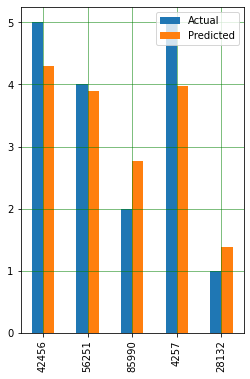

In [168]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})
display(df_temp)

df_temp = df_temp.iloc[[7,26,27,28,18]]
df_temp.plot(kind='bar',figsize=(4,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

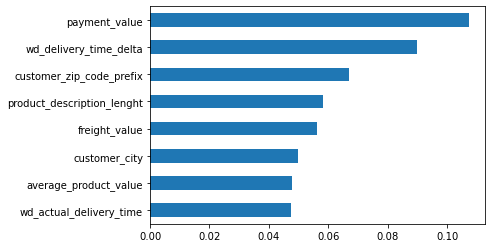

In [160]:
model_ranks=pd.Series(rfr.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
model_ranks = model_ranks[18:]
ax=model_ranks.plot(kind='barh', linewidth='50')

In [161]:
rmse =np.sqrt(mse)
rmse


1.2917832411986323

In [162]:
print((np.asarray(y_test) == y_pred_rfc).mean())

0.0014392630972941854
